In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def run_network(h=128):
    x = torch.randn(1024,h) 
    # Everybody would use nn.linear here, but this is 2012
    # For reason see slides
    scale = 1 / np.sqrt(h)
    w1 = torch.randn(h,h) * scale
    w2 = torch.randn(h,h) * scale
    w3 = torch.randn(h,h) * scale
    
    h1 = torch.relu(x.matmul(w1))
    h2 = torch.relu(h1.matmul(w2))
    h3 = torch.relu(h2.matmul(w3))
    return h1, h2, h3

h1, h2, h3 = run_network(h=32)

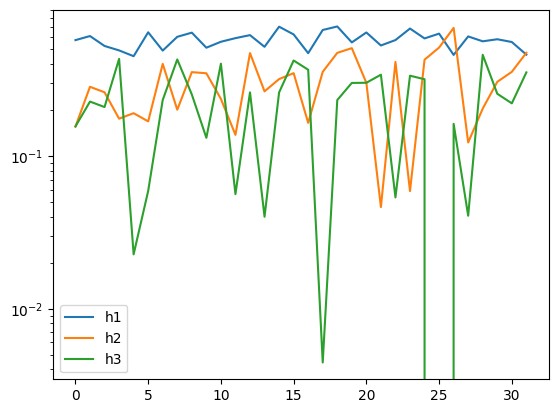

In [6]:
# Observe that at both scales networks behave same
# Feature get smaller due to ReLU

plt.plot(h1.std(dim=0), label="h1")
plt.plot(h2.std(dim=0), label="h2")
plt.plot(h3.std(dim=0), label="h3")
plt.yscale("log")
plt.legend()

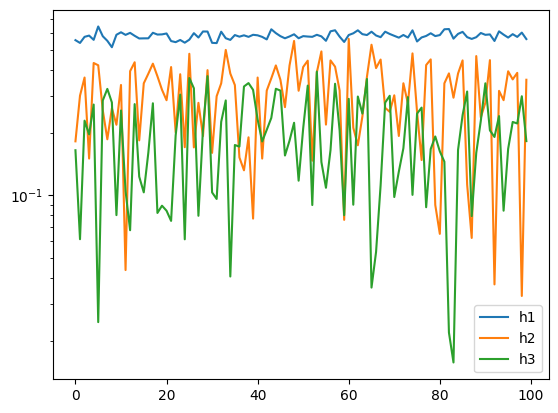

In [7]:
h1, h2, h3 = run_network(h=1024)
plt.plot(h1.std(dim=0)[:100], label="h1")
plt.plot(h2.std(dim=0)[:100], label="h2")
plt.plot(h3.std(dim=0)[:100], label="h3")
plt.yscale("log")
plt.legend()